# **Decision Tree. Scikit-learn**

Qaror daraxti (Decision Tree) – bu klassifikatsiya va regressiya muammolarini yechishda ishlatiladigan nazoratli o'rganish (supervised learning) algoritmi. U ma'lumotlarni tahlil qilish va qaror qabul qilish uchun daraxt shaklidagi modelni yaratadi.

**Asosiy tushunchalar:**
*   **Tugun (Node):** Daraxtning har bir nuqtasi tugun deb ataladi. Ular quyidagi turlarga bo'linadi:
    *   **Ildiz tugun (Root Node):** Daraxtning eng yuqori tuguni bo'lib, u butun ma'lumotlar to'plamini ifodalaydi. Undan ajralish jarayoni boshlanadi.
    *   **Ichki tugun (Internal Node):** Ma'lum bir shartga ko'ra ma'lumotlar to'plamini kichik guruhlarga ajratadigan tugun. Har bir ichki tugun test yoki atributni ifodalaydi.
    *   **Barg tugun (Leaf Node / Terminal Node):** Daraxtning eng oxirgi tugunlari bo'lib, ular oxirgi qaror (klassifikatsiya) yoki qiymat (regressiya) ni ifodalaydi. Bu tugunlarda boshqa ajralishlar bo'lmaydi.
*   **Tarmoq (Branch):** Tugunlarni bog'laydigan chiziqlar. Ular test natijasini (ha/yo'q, qiymat oralig'i va hokazo) ko'rsatadi.

**Qanday ishlaydi?**
1.  Algoritm ildiz tugundan boshlanadi.
2.  Har bir tugunda ma'lumotlar to'plamini eng yaxshi ajratadigan atributni (xususiyatni) topadi.
3.  Bu atributga asoslanib, ma'lumotlar kichikroq guruhlarga bo'linadi va har bir guruh uchun yangi tugunlar (tarmoqlar) hosil bo'ladi.
4.  Bu jarayon ma'lum bir to'xtash shartiga (masalan, barg tugundagi ma'lumotlarning sof bo'lishi, daraxtning maksimal chuqurligi, tugundagi minimal misollar soni) erishguncha takrorlanadi.

**Afzalliklari:**
*   Tushunish va izohlash oson.
*   Ma'lumotlarni oldindan tayyorlashga kamroq talabchan (masalan, normalizatsiya qilish shart emas).
*   Klassifikatsiya va regressiya muammolarini yechishda samarali.
*   Noparametrik algoritm.

**Kamchiliklari:**
*   Haddan tashqari moslashishga (overfitting) moyil bo'lishi mumkin, ya'ni o'quv ma'lumotlarida juda yaxshi ishlaydi, ammo yangi ma'lumotlarda yomon natija beradi.
*   Kichik o'zgarishlar ham daraxt tuzilishini sezilarli darajada o'zgartirishi mumkin (noturg'un).
*   Optimal daraxtni qurish NP-to'liq masala hisoblanadi, shuning uchun odatda evristik usullardan foydalaniladi.

**Qo'llanilishi:**
*   Tibbiy diagnostika
*   Mijozlar segmentatsiyasi
*   Moliyaviy firibgarlikni aniqlash
*   Kredit riskini baholash

**Entropiya (Entropy)** – bu ma'lumotlar to'plamidagi tartibsizlik yoki noaniqlik darajasini o'lchaydigan tushuncha. Qaror daraxtlari kontekstida, entropiya ma'lum bir tugundagi ma'lumotlarning 'sof' emasligini, ya'ni turli sinflarga mansub misollarning aralashganligini bildiradi.

**Asosiy g'oya:**
*   **Yuqori entropiya:** Ma'lumotlar to'plamida turli sinflarga mansub misollar teng taqsimlangan bo'lsa, entropiya yuqori bo'ladi. Bu katta noaniqlikni anglatadi.
*   **Past entropiya:** Agar ma'lumotlar to'plami asosan bir sinfga mansub misollardan iborat bo'lsa (yoki butunlay bir sinfga mansub bo'lsa), entropiya past bo'ladi. Bu kichik noaniqlikni yoki 'soflikni' anglatadi.
*   **Nol entropiya:** Agar barcha misollar bir xil sinfga tegishli bo'lsa, entropiya nolga teng bo'ladi. Bu tugunning 'sof' ekanligini va undan keyingi ajralishga hojat yo'qligini bildiradi (ya'ni, u barg tugun bo'ladi).

**Qaror daraxtlarida qo'llanilishi:**
Qaror daraxtlari ma'lumotlarni ajratish uchun entropiya (yoki Gini indeksi kabi boshqa o'lchovlar)dan foydalanadi. Algoritm har bir tugunda entropiyani maksimal darajada kamaytiradigan atributni (xususiyatni) topishga harakat qiladi. Bu **Axborot daromadi (Information Gain)** deb nomlanadi. Axborot daromadi – bu ma'lum bir atribut bo'yicha ajralishdan oldingi va keyingi entropiya farqi. Algoritm eng yuqori axborot daromadini beradigan atributni tanlab, ma'lumotlarni eng samarali tarzda ajratadi va daraxtni quradi.

**Formulasi (misol):**
Ikki sinfli (P va N) tasniflash muammosi uchun entropiya formulasi quyidagicha:

$E = -p_P \log_2(p_P) - p_N \log_2(p_N)$

Bu yerda:
*   $p_P$ – P sinfiga mansub misollarning umumiy misollar soniga nisbati.
*   $p_N$ – N sinfiga mansub misollarning umumiy misollar soniga nisbati.

# **Misol**

# **Bemorga dori tavsiya qilish tizimi**

Tasvvur qiling siz tadqiqot uchun ma'lumot to'playdigan tibbiy tadqiqotidasiz. Siz bir xil kassalikdan aziyat chekkan bemorlar haqida ma'lumot to'pladingiz. Davolash kursi davomida bemorlarga 5 xil doridan biri ijobiy ta'sir qildi.

Sizning vazifangiz, xuddi shu kasallik bilan kasallangan bemorga qaysi dori mos kelishi mumkinligini aniqlaydigan model yaratish. Ushbu muammo ko'p toifali klassifikator (multiclass classification) yordamida xal qilinadi.

Model yaratish Decision Tree algoritimidan foydalanamiz.

In [77]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

## **Ustun tasniflari**
### Age - yosh

### Sex - jinsi

### BP - qon bosimi

### Cholesterol - qondagi xolestron

### Na_to_K - organizmdagi natriy miqdorining kaliyga nisbati

### DataFrame'dagi 'Drug' ustuni bemorga tavsiya qilingan yoki ijobiy ta'sir ko'rsatgan dori turini bildiradi. Bu ustun Decision Tree modeli orqali bashorat qilishimiz kerak bo'lgan maqsadli o'zgaruvchidir (target variable).

In [79]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
101,45,F,HIGH,HIGH,12.854,drugA
199,40,F,LOW,NORMAL,11.349,drugX
136,55,F,HIGH,HIGH,10.977,drugB
102,28,F,LOW,HIGH,13.127,drugC
105,37,M,LOW,NORMAL,8.968,drugX
18,23,M,LOW,HIGH,7.298,drugC
99,15,F,HIGH,NORMAL,16.725,drugY
93,42,F,LOW,NORMAL,29.271,drugY
62,67,M,LOW,NORMAL,20.693,drugY
25,28,F,HIGH,NORMAL,18.809,drugY


In [80]:
df.shape

(200, 6)

In [81]:
df['Sex'].value_counts()

,count
Sex,
M,104
F,96


In [82]:
df['BP'].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [83]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


## Matnli ustunlarga ishlov beramiz

In [84]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

# Sex (Jinsi): F (Ayol) -> 0, M (Erkak) -> 1
# BP (Qon bosimi): HIGH (Yuqori) -> 0, LOW (Past) -> 1, NORMAL (Normal) -> 2
# Cholesterol (Xolesterin): HIGH (Yuqori) -> 0, NORMAL (Normal) -> 1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
17,43,1,0,0,13.972,drugA
196,16,1,1,0,12.006,drugC
21,63,1,2,0,25.917,drugY
38,39,0,2,1,9.709,drugX
33,65,0,0,1,31.876,drugY
20,57,1,1,1,19.128,drugY
74,31,1,0,1,17.069,drugY
73,41,0,2,1,22.905,drugY
163,21,0,0,1,28.632,drugY
3,28,0,2,0,7.798,drugX


## X va y ustunlarini alohida qilib olamiz yani y ga oxirdagi bashorat qilmoqchi bo'lgan  Drug ustunini va qolganlarini esa X ga saqlaymiz

In [85]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:6]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043],
       [22.   ,  0.   ,  2.   ,  0.   ,  8.607]])

In [86]:
y = df['Drug'].values
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [87]:
df.shape

(200, 6)

In [88]:
X.shape

(200, 5)

In [89]:
y.shape

(200,)

## Train/test split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

# X: Bu sizning mustaqil o'zgaruvchilaringiz (features) to'plami. Ya'ni, bashorat qilish
# uchun foydalaniladigan ma'lumotlar ustunlari (bu holatda Age, Sex, BP, Cholesterol, Na_to_K).

# y: Bu sizning qaram o'zgaruvchingiz (target variable). Ya'ni, bashorat qilinishi kerak bo'lgan ustun (bu holatda Drug).

# random_state=20: Bu esa ma'lumotlarni tasodifiy ajratish uchun ishlatiladigan urug' (seed) hisoblanadi.
# Bu parametrni belgilash, har safar kodni ishga tushirganingizda ma'lumotlar bir xil tarzda ajratilishini ta'minlaydi.
# Agar uni belgilamasangiz, har safar boshqacha natija olishingiz mumkin, bu esa tajribalarni takrorlashni qiyinlashtiradi.

# test_size=0.4 - o'quv ma'lumotlaringizning 40 foizini (yoki 0.4 qismini) test qilish uchun.
# Qolgan 60 foizi (0.6 qismi) esa modelni o'rgatish (train) uchun ishlatiladi.

In [91]:
X_train.shape

(120, 5)

In [92]:
X_test.shape

(80, 5)

In [93]:
y_train.shape

(120,)

In [94]:
y_test.shape

(80,)

1. X_train (Mustaqil o'zgaruvchilarning mashg'ulot to'plami):

Bu X (kirish xususiyatlari) ma'lumotlaringizning 60% ni tashkil qiladi, chunki test_size=0.4 deb belgilangan. Ya'ni, umumiy ma'lumotlarning 60 foizi modelni o'rgatish uchun ishlatiladi.

2. X_test (Mustaqil o'zgaruvchilarning test to'plami):

Bu X (kirish xususiyatlari) ma'lumotlaringizning 40% ni tashkil qiladi, chunki test_size=0.4 deb belgilangan. Bu qism modelni baholash, ya'ni modelning yangi, ilgari ko'rmagan ma'lumotlarda qanchalik yaxshi ishlashini tekshirish uchun ishlatiladi.

3. y_train (Maqsadli o'zgaruvchining mashg'ulot to'plami):

Bu y (maqsadli o'zgaruvchi, bu holatda 'Drug') ma'lumotlaringizning 60% ni tashkil qiladi. Bu X_train ga mos keladigan javob qiymatlari bo'lib, modelga bashorat qilishni o'rgatishda yordam beradi.

4. y_test (Maqsadli o'zgaruvchining test to'plami):

Bu y (maqsadli o'zgaruvchi) ma'lumotlaringizning 40% ni tashkil qiladi. Bu X_test ga mos keladigan javob qiymatlari bo'lib, modelning test ma'lumotlaridagi bashoratlarini haqiqiy qiymatlar bilan solishtirish uchun ishlatiladi.

Nima uchun ma'lumotlarni ajratamiz?

Ma'lumotlarni mashg'ulot va test to'plamlariga ajratishning asosiy sababi – overfitting (haddan tashqari moslashuv) dan qochish va modelning umumlashtirish qobiliyatini (ya'ni, yangi, ko'rilmagan ma'lumotlarda qanchalik yaxshi ishlashini) realistik baholashdir.

Agar model faqat o'rgatilgan ma'lumotlarda juda yaxshi ishlasa, lekin yangi ma'lumotlarda yomon natija bersa, bu overfitting bo'lganini anglatadi. train_test_split yordamida biz modelni bir to'plamda o'rgatamiz va boshqa to'plamda (test to'plami) sinab ko'ramiz, shu bilan modelning umumlashtirish qobiliyatini aniqlaymiz.

## Model

In [95]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# tree_model = DecisionTreeClassifier(): Bu qator DecisionTreeClassifier algoritmining yangi nusxasini (obyektini)
# yaratadi. Bu xuddi "men qaror daraxti modelini ishlatmoqchiman" deyishga o'xshaydi, lekin u hali hech narsani o'rganmagan.

# tree_model.fit(X_train, y_train): Bu qator yaratilgan tree_modelni o'rgatadi. Ya'ni, model X_train (o'qitish uchun ma'lumotlar,
# ya'ni "sabablar") va y_train (ularga mos keladigan "natijalar" yoki "dorilar") yordamida o'zini sozlaydi va bashorat qilishni o'rganadi.

DecisionTreeClassifier()

## Baholash

In [96]:
y_predict = tree_model.predict(X_test)

In [97]:
print(classification_report(y_test, y_predict))
# Har bir yani 5 xil dori bo'yicha precision, recall, f1-score, support toifalardagi aniqligini ko'rishimiz mumkin

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [98]:
from sklearn.metrics import accuracy_score
print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_predict))

# Bu umumiy aniqligini chiqaradi

DecisionTree's Accuracy:  0.95


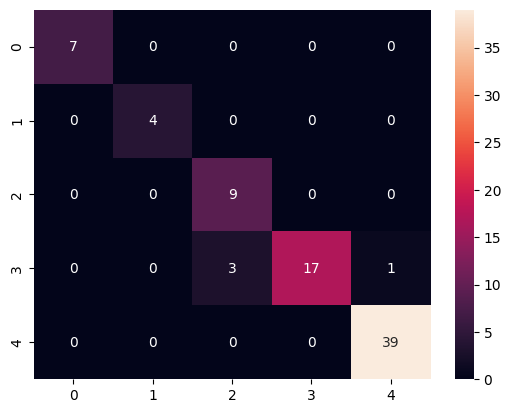

In [99]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

# bu kod model bashoratlarining to'g'ri va noto'g'ri natijalarini ko'rsatadigan jadvalni (confusion matrix) grafik shaklda chizadi.

## Cross-validation

In [100]:
predict = cross_val_predict(estimator=tree_model, X=X, y=y, cv=5)
print("Classification Report:")
print(classification_report(y, predict))

Classification Report:
              precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



# **NEW SECTION**

## Decission Tree chizamiz

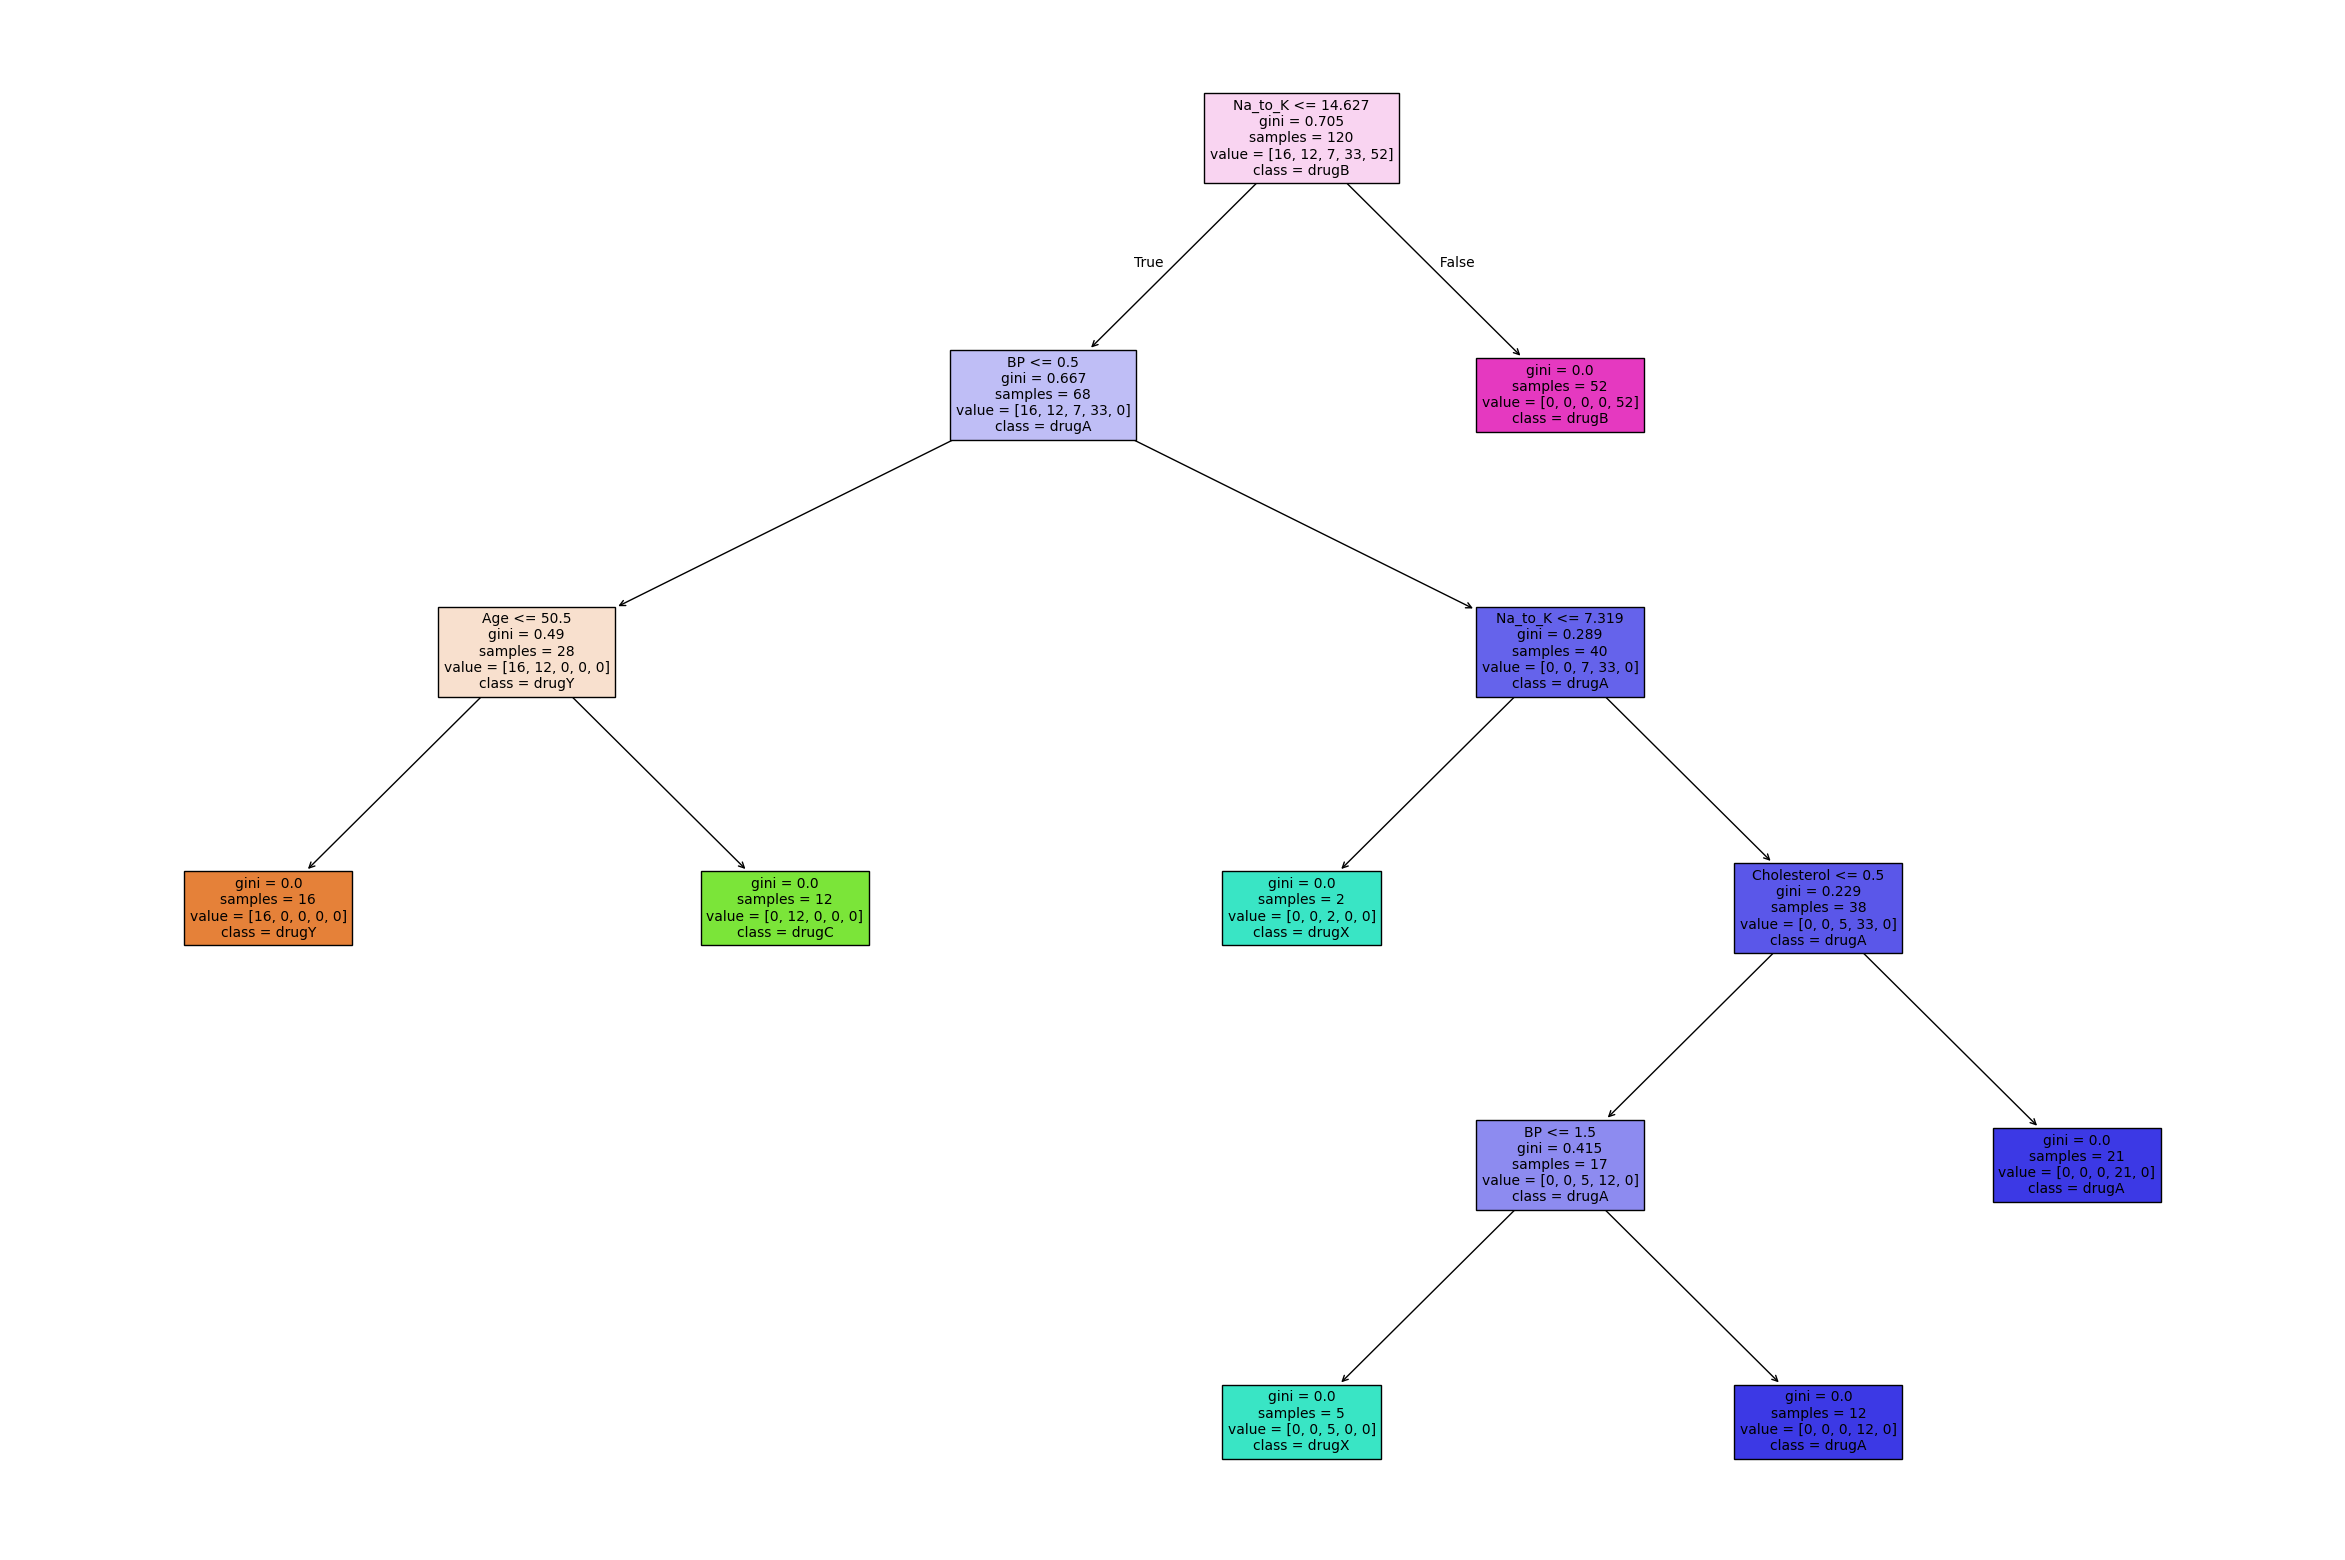

In [101]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True, fontsize=10)
plt.show()

# Bu kod 'Decision Tree' modelingizni grafik ko'rinishida chizadi:

# cols = df.drop('Drug', axis=1).columns: Bu modelning kirish ustunlari (features) nomlarini oladi, ya'ni 'Drug' ustunini tashlab yuboradi.
# classes = df['Drug'].unique(): Bu esa bashorat qilinadigan 'Drug' ustunining noyob qiymatlarini (dorilarning nomlarini) oladi.
# plt.figure(figsize=(30,20)): Bu chizma uchun kattaroq o'lchamli bo'sh joy (figura) yaratadi.
# tree.plot_tree(...): Nihoyat, bu funksiya yuqorida aniqlangan ustun nomlari (feature_names), dori sinflari
# (class_names), tugunlarni to'ldirish (filled=True) va shrift o'lchami (fontsize=10) bilan birga 'Decision Tree' ni chizib beradi.


# **NEW SECTION**

## **Giperparametrlar (Hyperparameters)**

**Giperparametrlar** – bu mashina o'rganish modelini o'qitishdan oldin qo'lda sozlanadigan konfiguratsiya sozlamalari. Ular modelning o'rganish jarayonini boshqaradi va modelning qanday ishlashini belgilaydi, lekin modelning o'zi tomonidan o'rganilmaydi.

**Asosiy farq:**
*   **Giperparametrlar:** Trening jarayonini sozlaydigan sozlamalar (masalan, o'rganish tezligi (learning rate), daraxtning maksimal chuqurligi (max_depth), tugundagi minimal misollar soni (min_samples_leaf)). Ularni biz kiritamiz.
*   **Model parametrlari:** Modelning o'zi tomonidan ma'lumotlardan o'rganiladigan qiymatlar (masalan, neyron tarmoqdagi vaznlar (weights), bias). Ular modelning ichki holatini belgilaydi.

**Nima uchun muhim?**
Giperparametrlar modelning ishlashiga sezilarli ta'sir ko'rsatadi. To'g'ri tanlangan giperparametrlar modelning aniqligini oshirishga va haddan tashqari moslashish (overfitting) yoki yetarlicha moslashmaslik (underfitting) kabi muammolardan qochishga yordam beradi. Ularni optimallashtirish modelni eng yaxshi natijalar berishga sozlash imkonini beradi.

## Biz avvalgi darslarda kNN da k qiymatini bergan edik yani u qiymatni to'g'ri tanlash model aniqligini oshirardi.

## Huddi shunday biz tree_model da ham k emas balki shunga o'xshagan bazi parametrlarni kiritib model aniqligini oshirishimiz mumkin pastdagi misollarda bunday parametrlar bilan bilan tanishamiz

# Hyperparameters

Har bir model o'ziga xos giperparametrlar bilan keladi, biz bu parametrlarni sozlash orqali model aniqligini yoki tezligini oshirishimiz mumkin.

k-NN uchun bu `k` ya'ni qo'shnilar soni edi. Decision Treen da esa bir nechta giperparametrlar mavjud. Barcha parametrlarni ushbu link orqali ko'rishingiz mumkin: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**`min_impurity_decrease'** - natija qanchalik "toza" bo'lishini belgilaydi. Standart qiymati 0

DecisionTree's Accuracy:  0.95


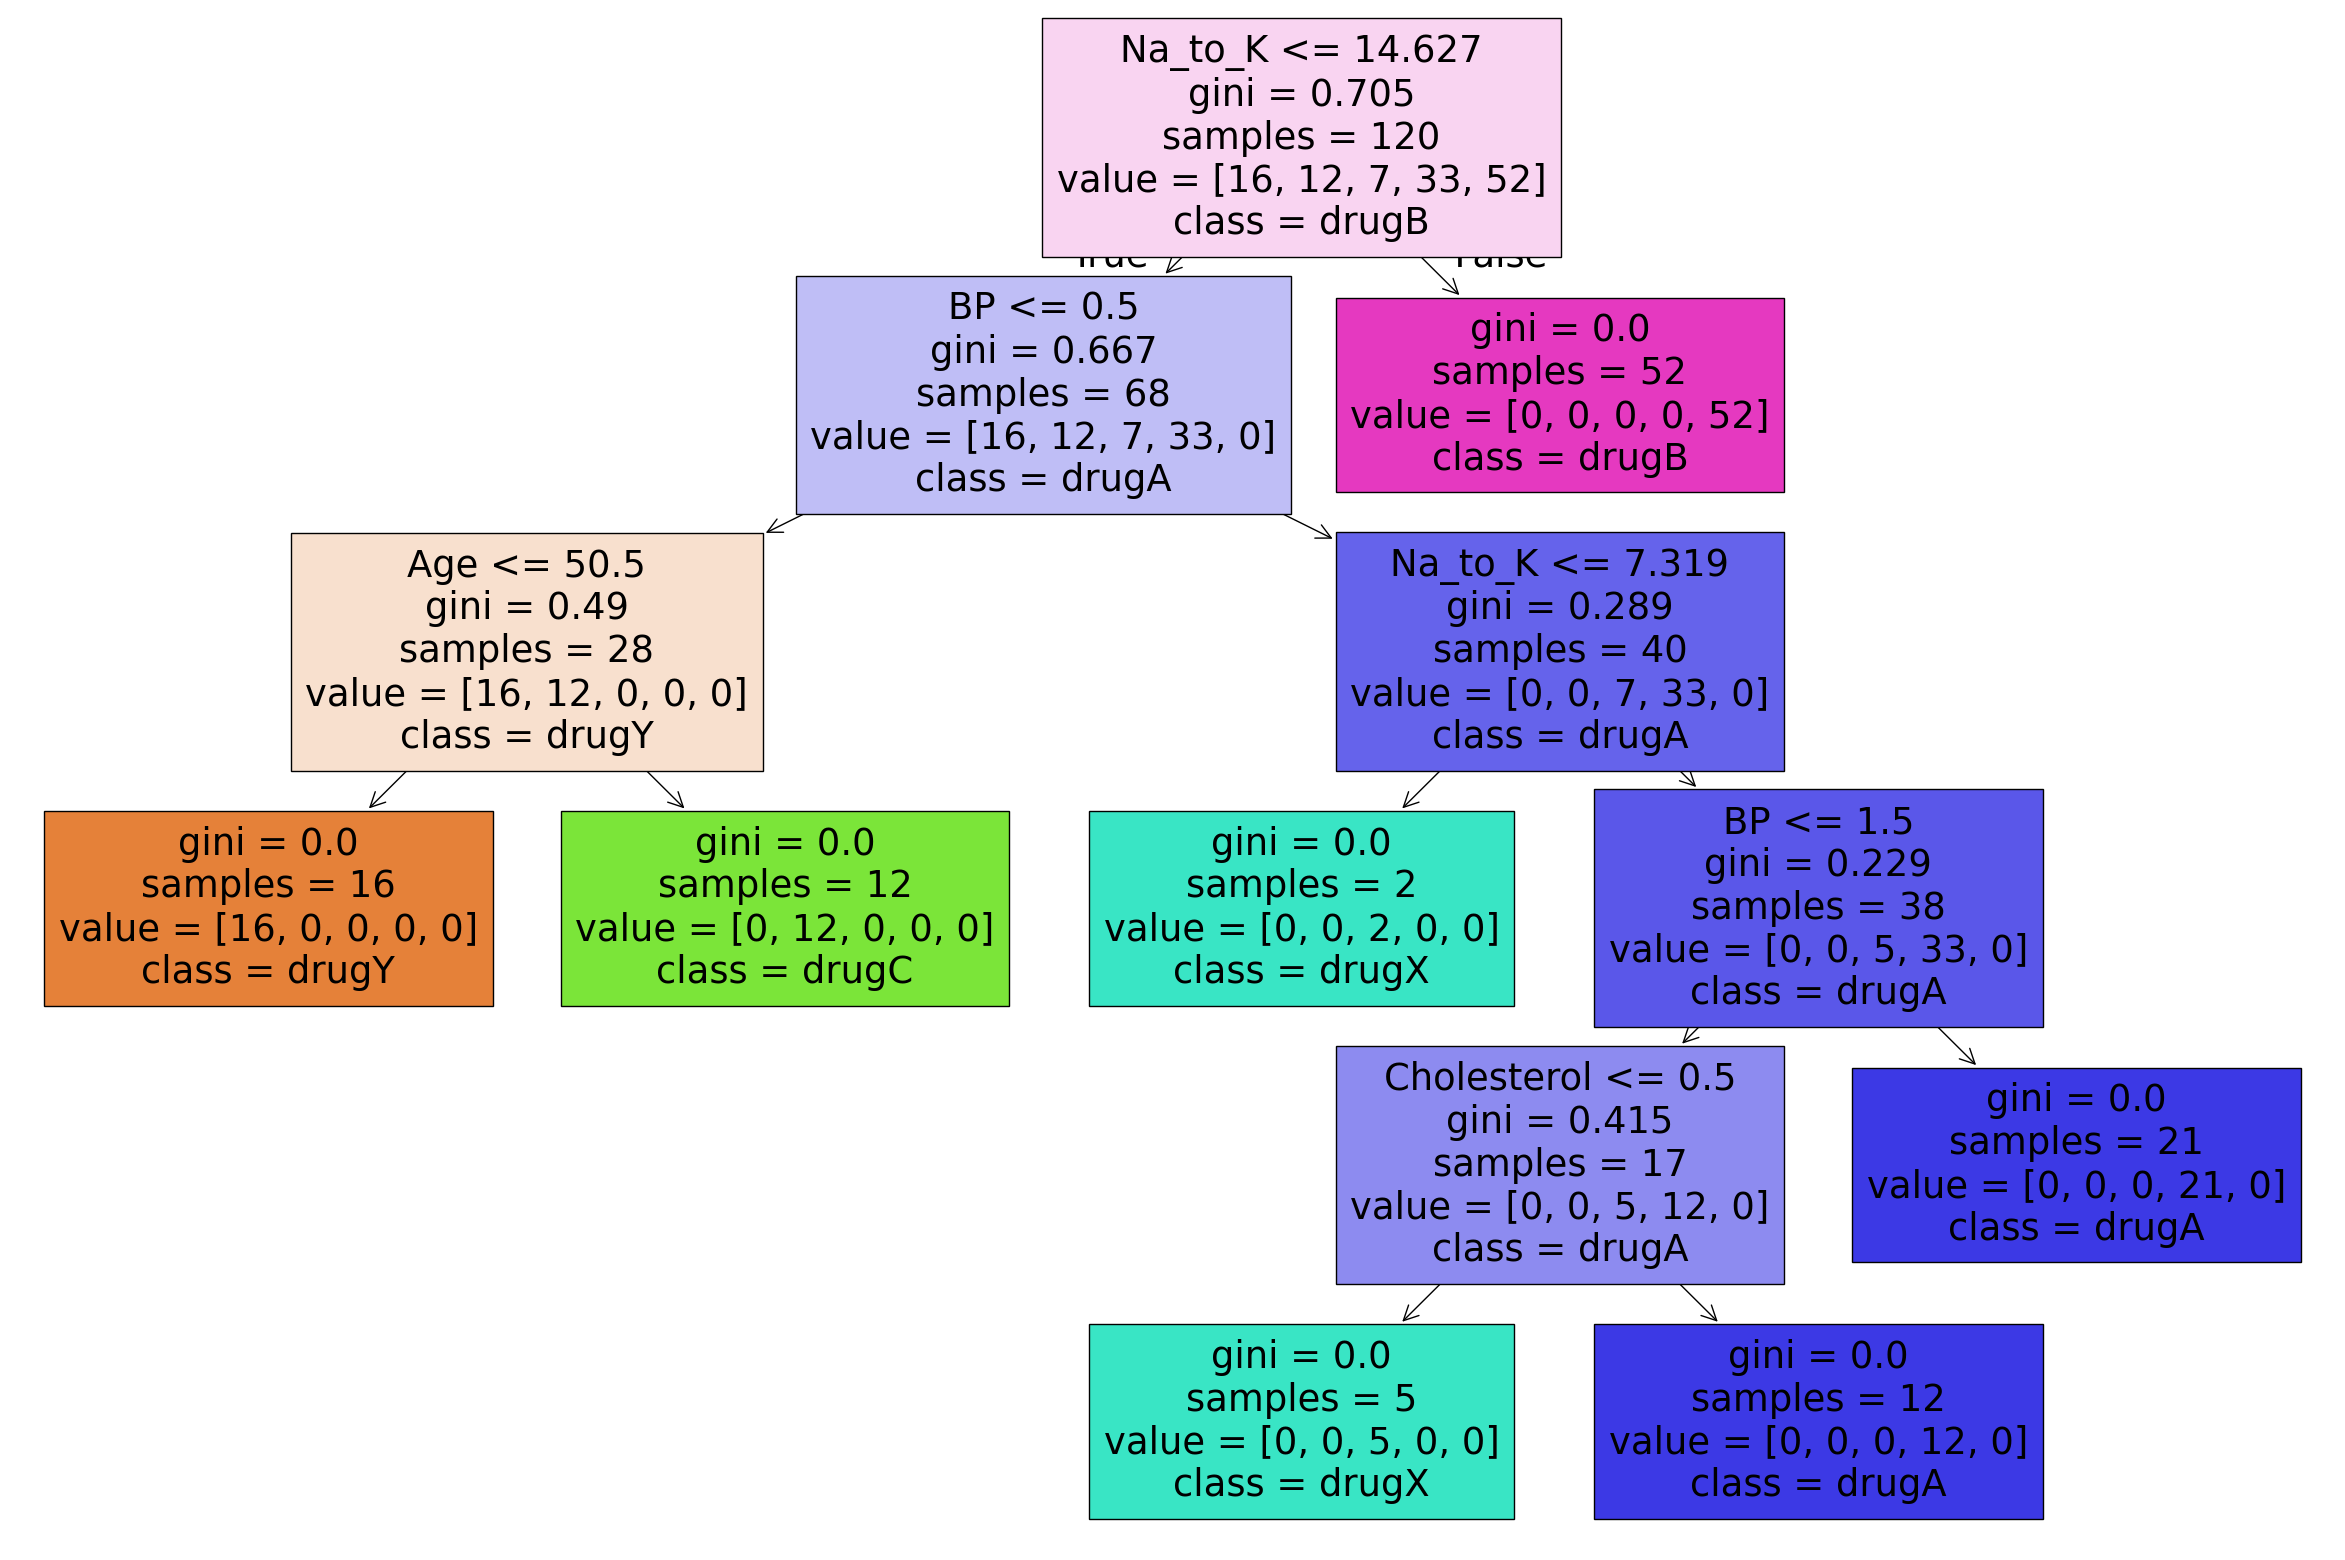

In [102]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
# Bu yerda DecisionTreeClassifier algoritmining yangi nusxasi yaratiladi. min_impurity_decrease=0.01
# parametri giperparametr bo'lib, daraxtning tugunlarini ajratish uchun minimal axborot daromadi (information gain)
# chegarasini belgilaydi. Ya'ni, agar ajratish natijasida kirlilik (impurity) shu qiymatdan kamroq pasaysa, ajratish amalga oshirilmaydi.
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_predict))
# Modelning bashorat qilingan qiymatlari (y_predict) haqiqiy test qiymatlari (y_test) bilan solishtirilib,
# modelning umumiy aniqligi (accuracy) hisoblanadi va ekranga chiqariladi.
plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()
# tree_model ni grafik shaklida chizadi. feature_names kirish ustunlarining nomlarini,
# class_names esa maqsadli sinflarning nomlarini ko'rsatadi. filled=True tugunlarni sinfga qarab ranglaydi.

# Bu yerda min_impurity_decrease=0.01 qilganimiz gini oxirigacha yani 0 yokida 0.1 bo'lganicha shox va barglarga ajraladi
# shox - deb bu bundan pastda yana ajralsa yani qisimlarga bo'linsa bu shoxi deyiladi yani daraxtni
# barg - bu bundan pastda bo'linmasa oxirgi qismi bo'lsa bunga barg deyiladi
# min_impurity_decrease=0.01 kattaroq qiymat bersak misol uchun 0.2 bersak faqat bitta to'rtburchak 2 taga bo'linadi xolos
# Ammo uning aniqligi pasayadi 0.01 qilganimizda 0.95 aniqlikda chiqdi agar 0.2 qilsak uning aniqligi pasaydi

DecisionTree's Accuracy:  0.7375


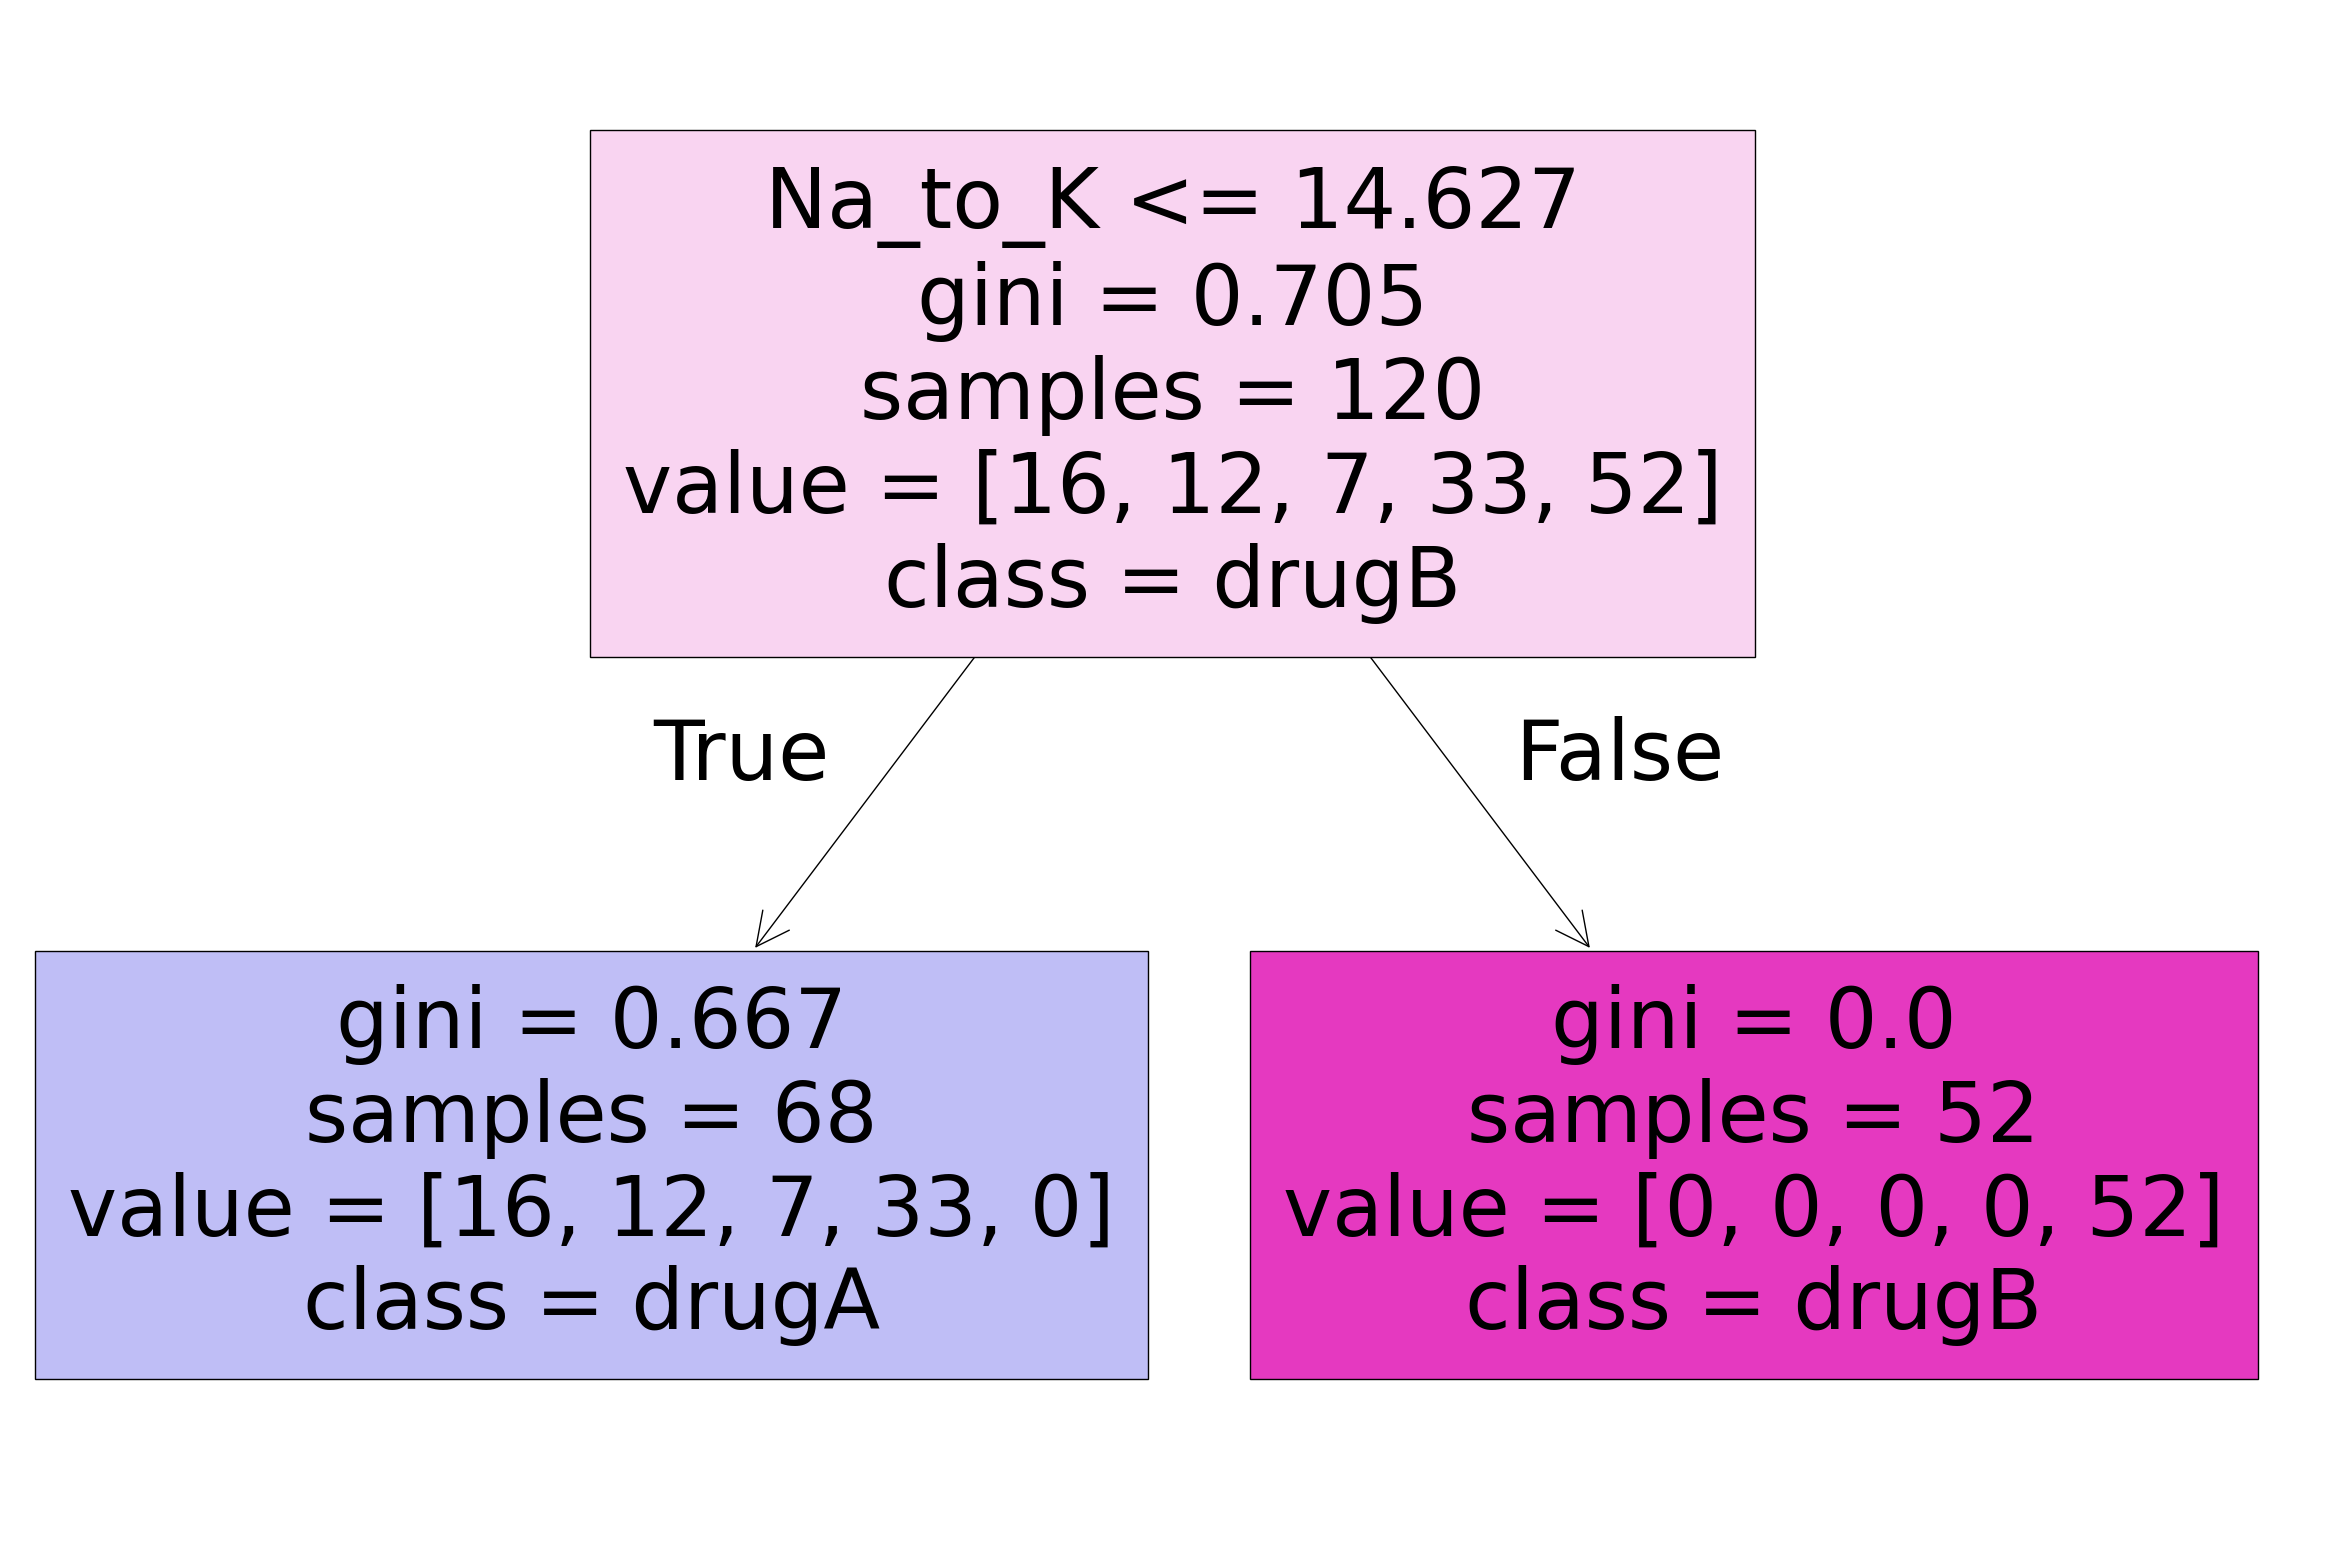

In [103]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.2)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_predict))
plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

# min_impurity_decrease=0.2 0.2 qilganimiz uchun uning aniqligi pasaydi yani 0.73 chiqardi

DecisionTree's Accuracy:  0.825


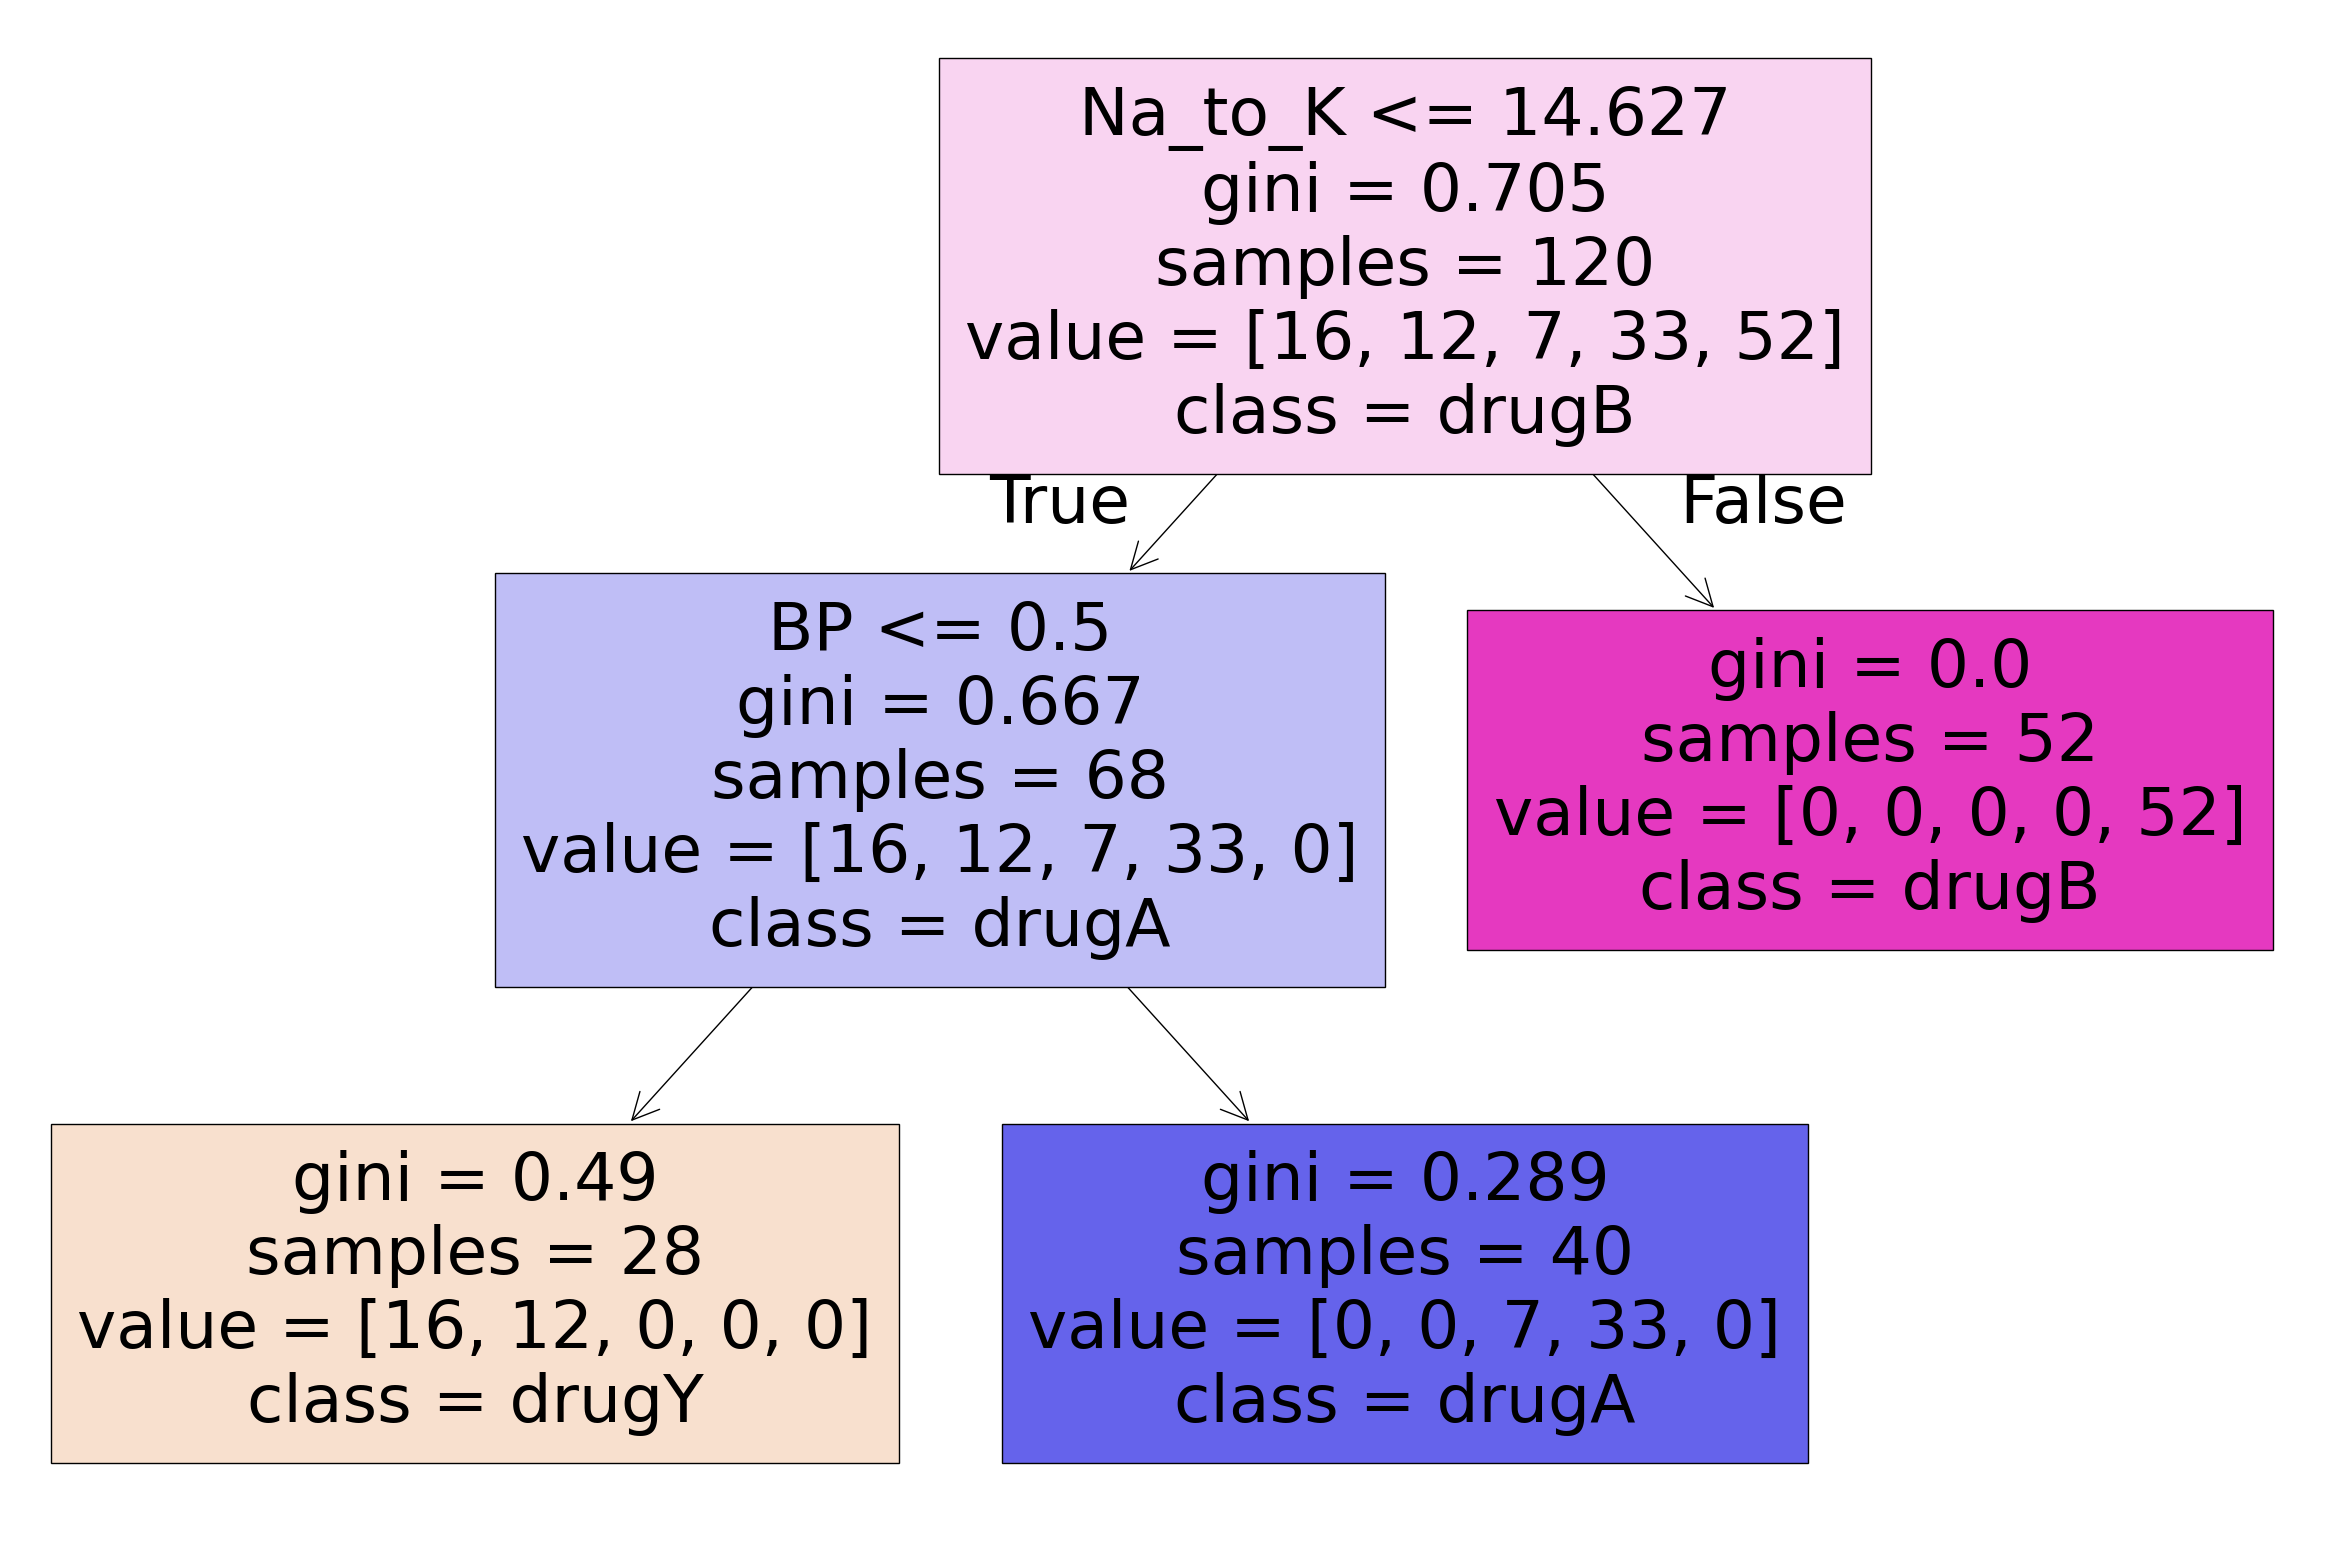

In [104]:
min_samples_split = 2
tree_model = DecisionTreeClassifier(min_samples_split = 0.4)
# Barg tugunida bo'lishi kerak bo'lgan namunalarning minimal soni. Har qanday chuqurlikdagi bo'linish nuqtasi faqat
# min_samples_leafchap va o'ng shoxlarning har birida kamida o'quv namunalarini qoldirgan taqdirdagina hisobga olinadi.
# Bu modelni, ayniqsa regressiyada, tekislash ta'siriga ega bo'lishi mumkin.
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_predict))
plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()


## **max_depth**-shajara qavatlari soni

DecisionTree's Accuracy:  0.8375


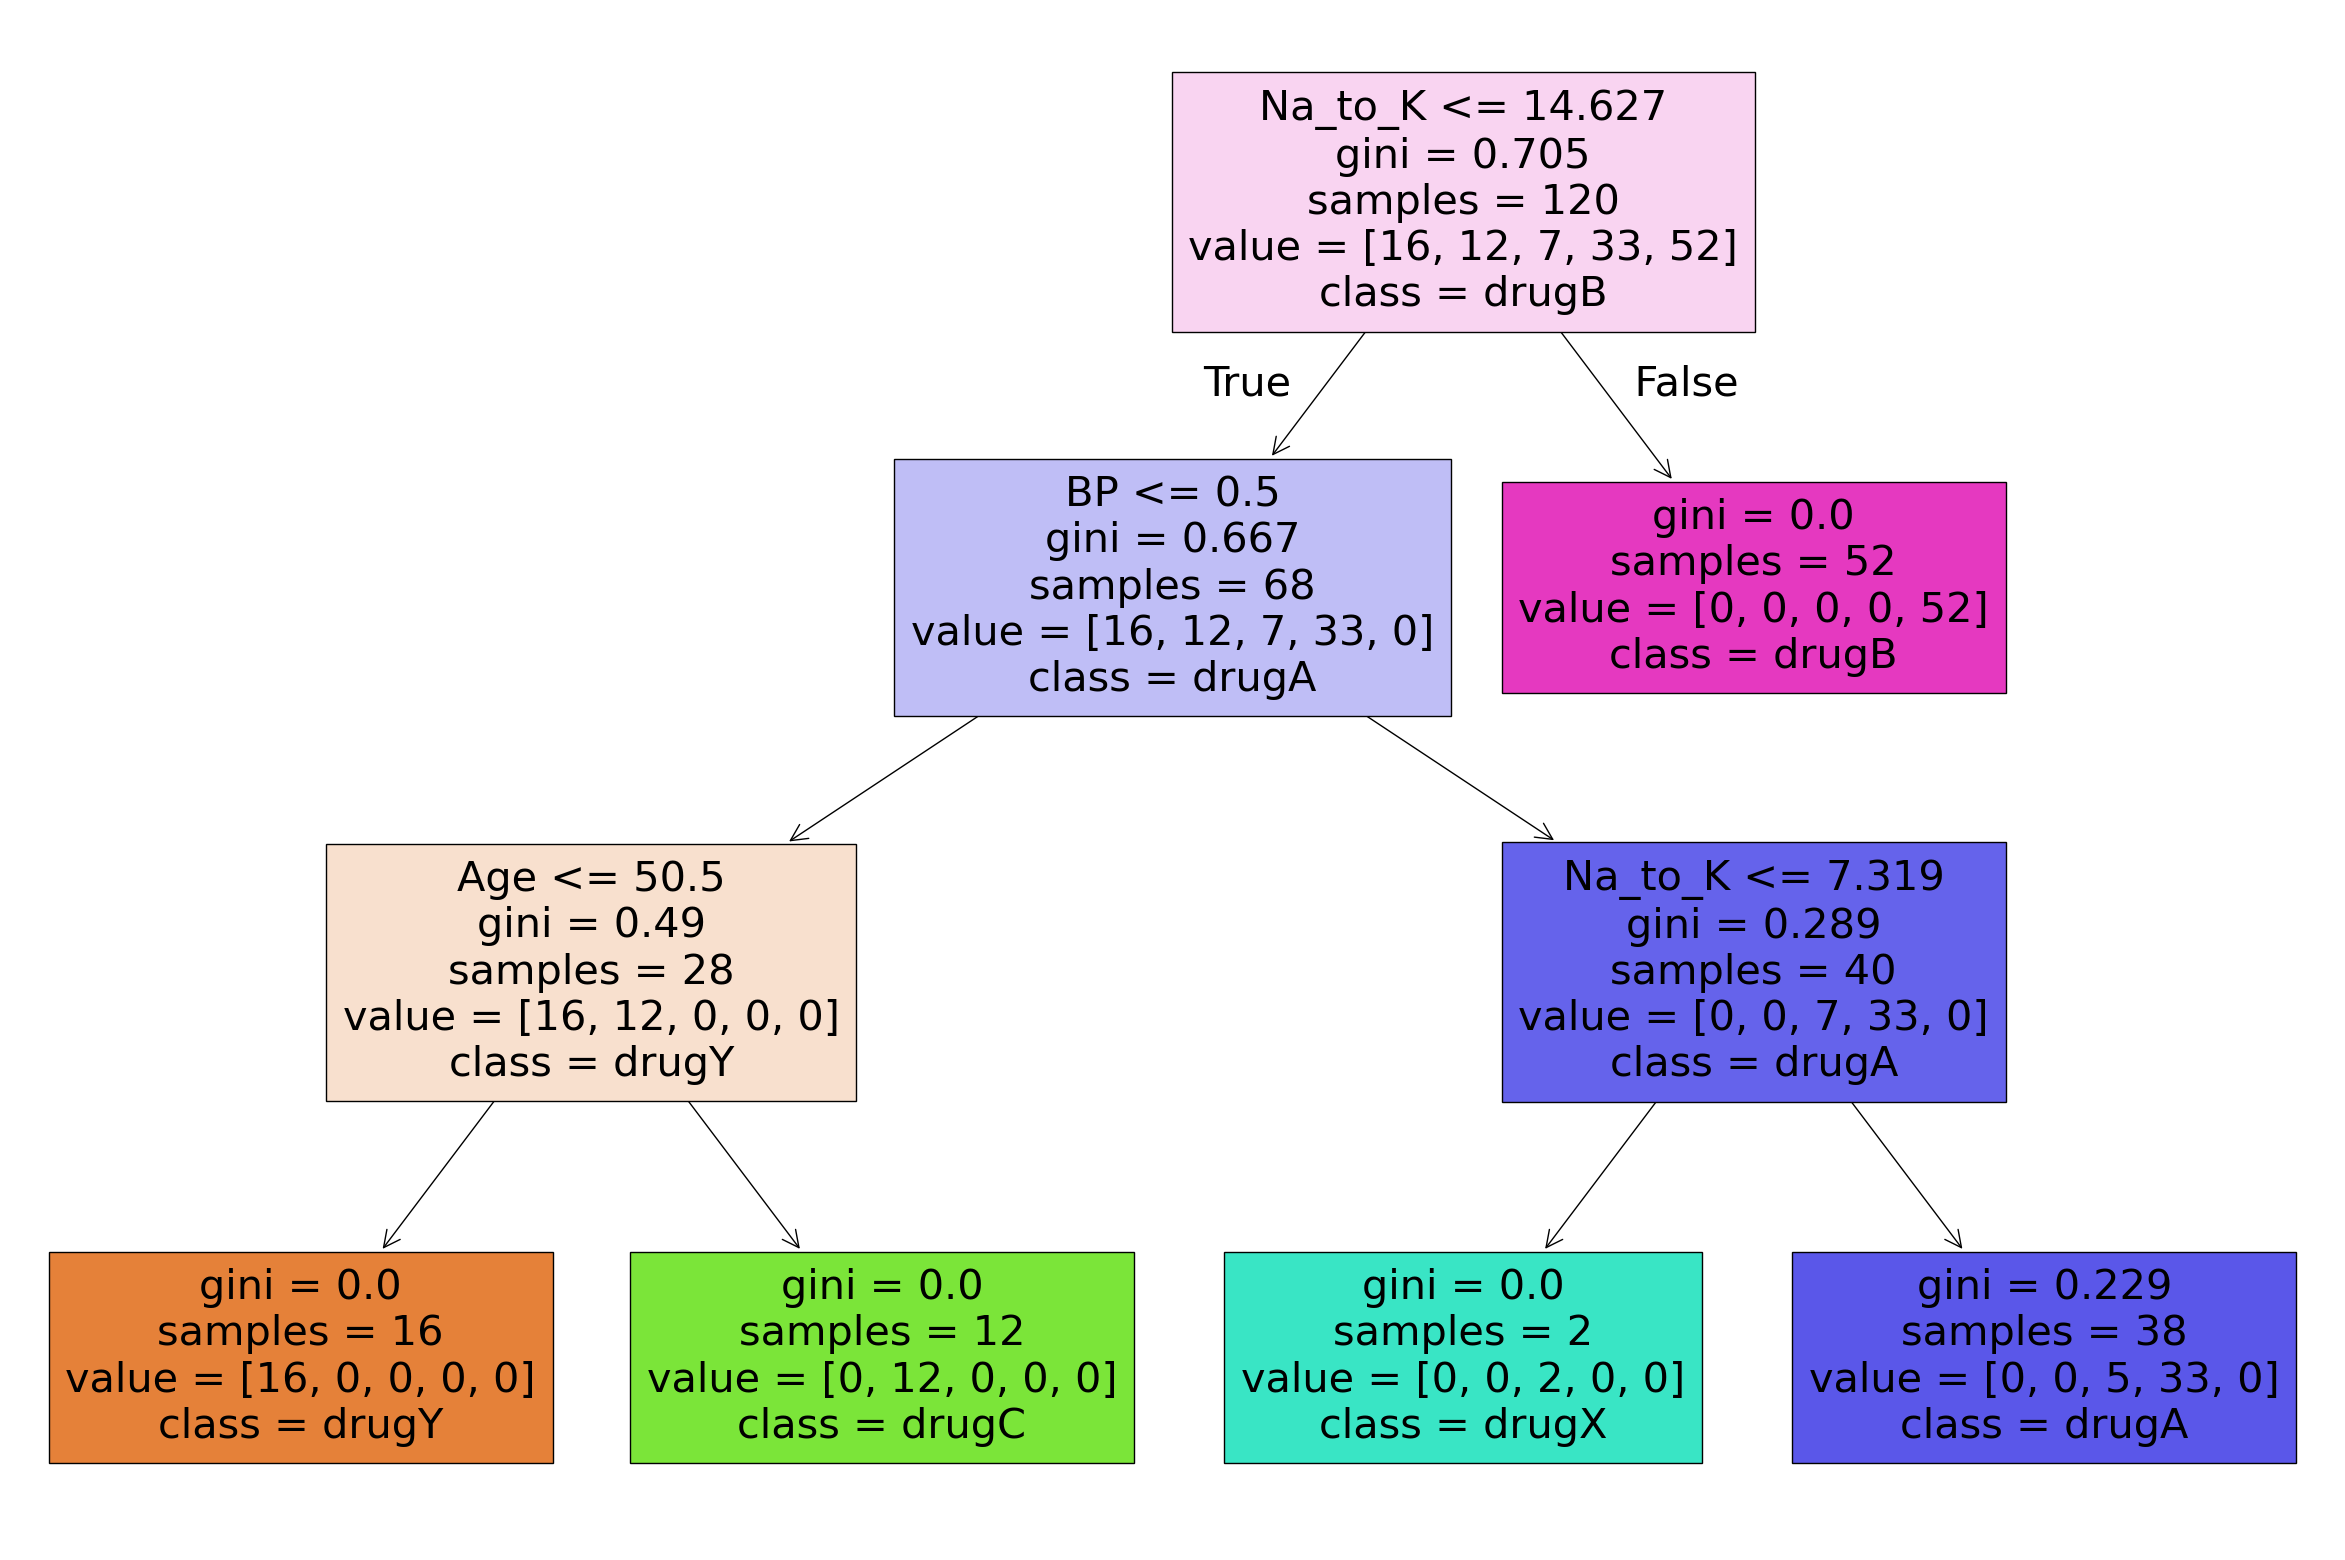

In [105]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

# min_impurity_decrease=0.2 yani gini oxirigacha 0 bo'lgancha bo'linadi
# max_depth=3 bu Ma'nosi: Daraxtning maksimal chuqurligini belgilaydi.
# Ya'ni, ildiz tugundan eng uzoq barg tugunigacha bo'lgan yo'ldagi tugunlar sonini cheklaydi.
# Bunda qator soni 3 ta bo'ladi max_depth=3 qilganim uchun bundan pastdagi barg

DecisionTree's Accuracy:  0.825


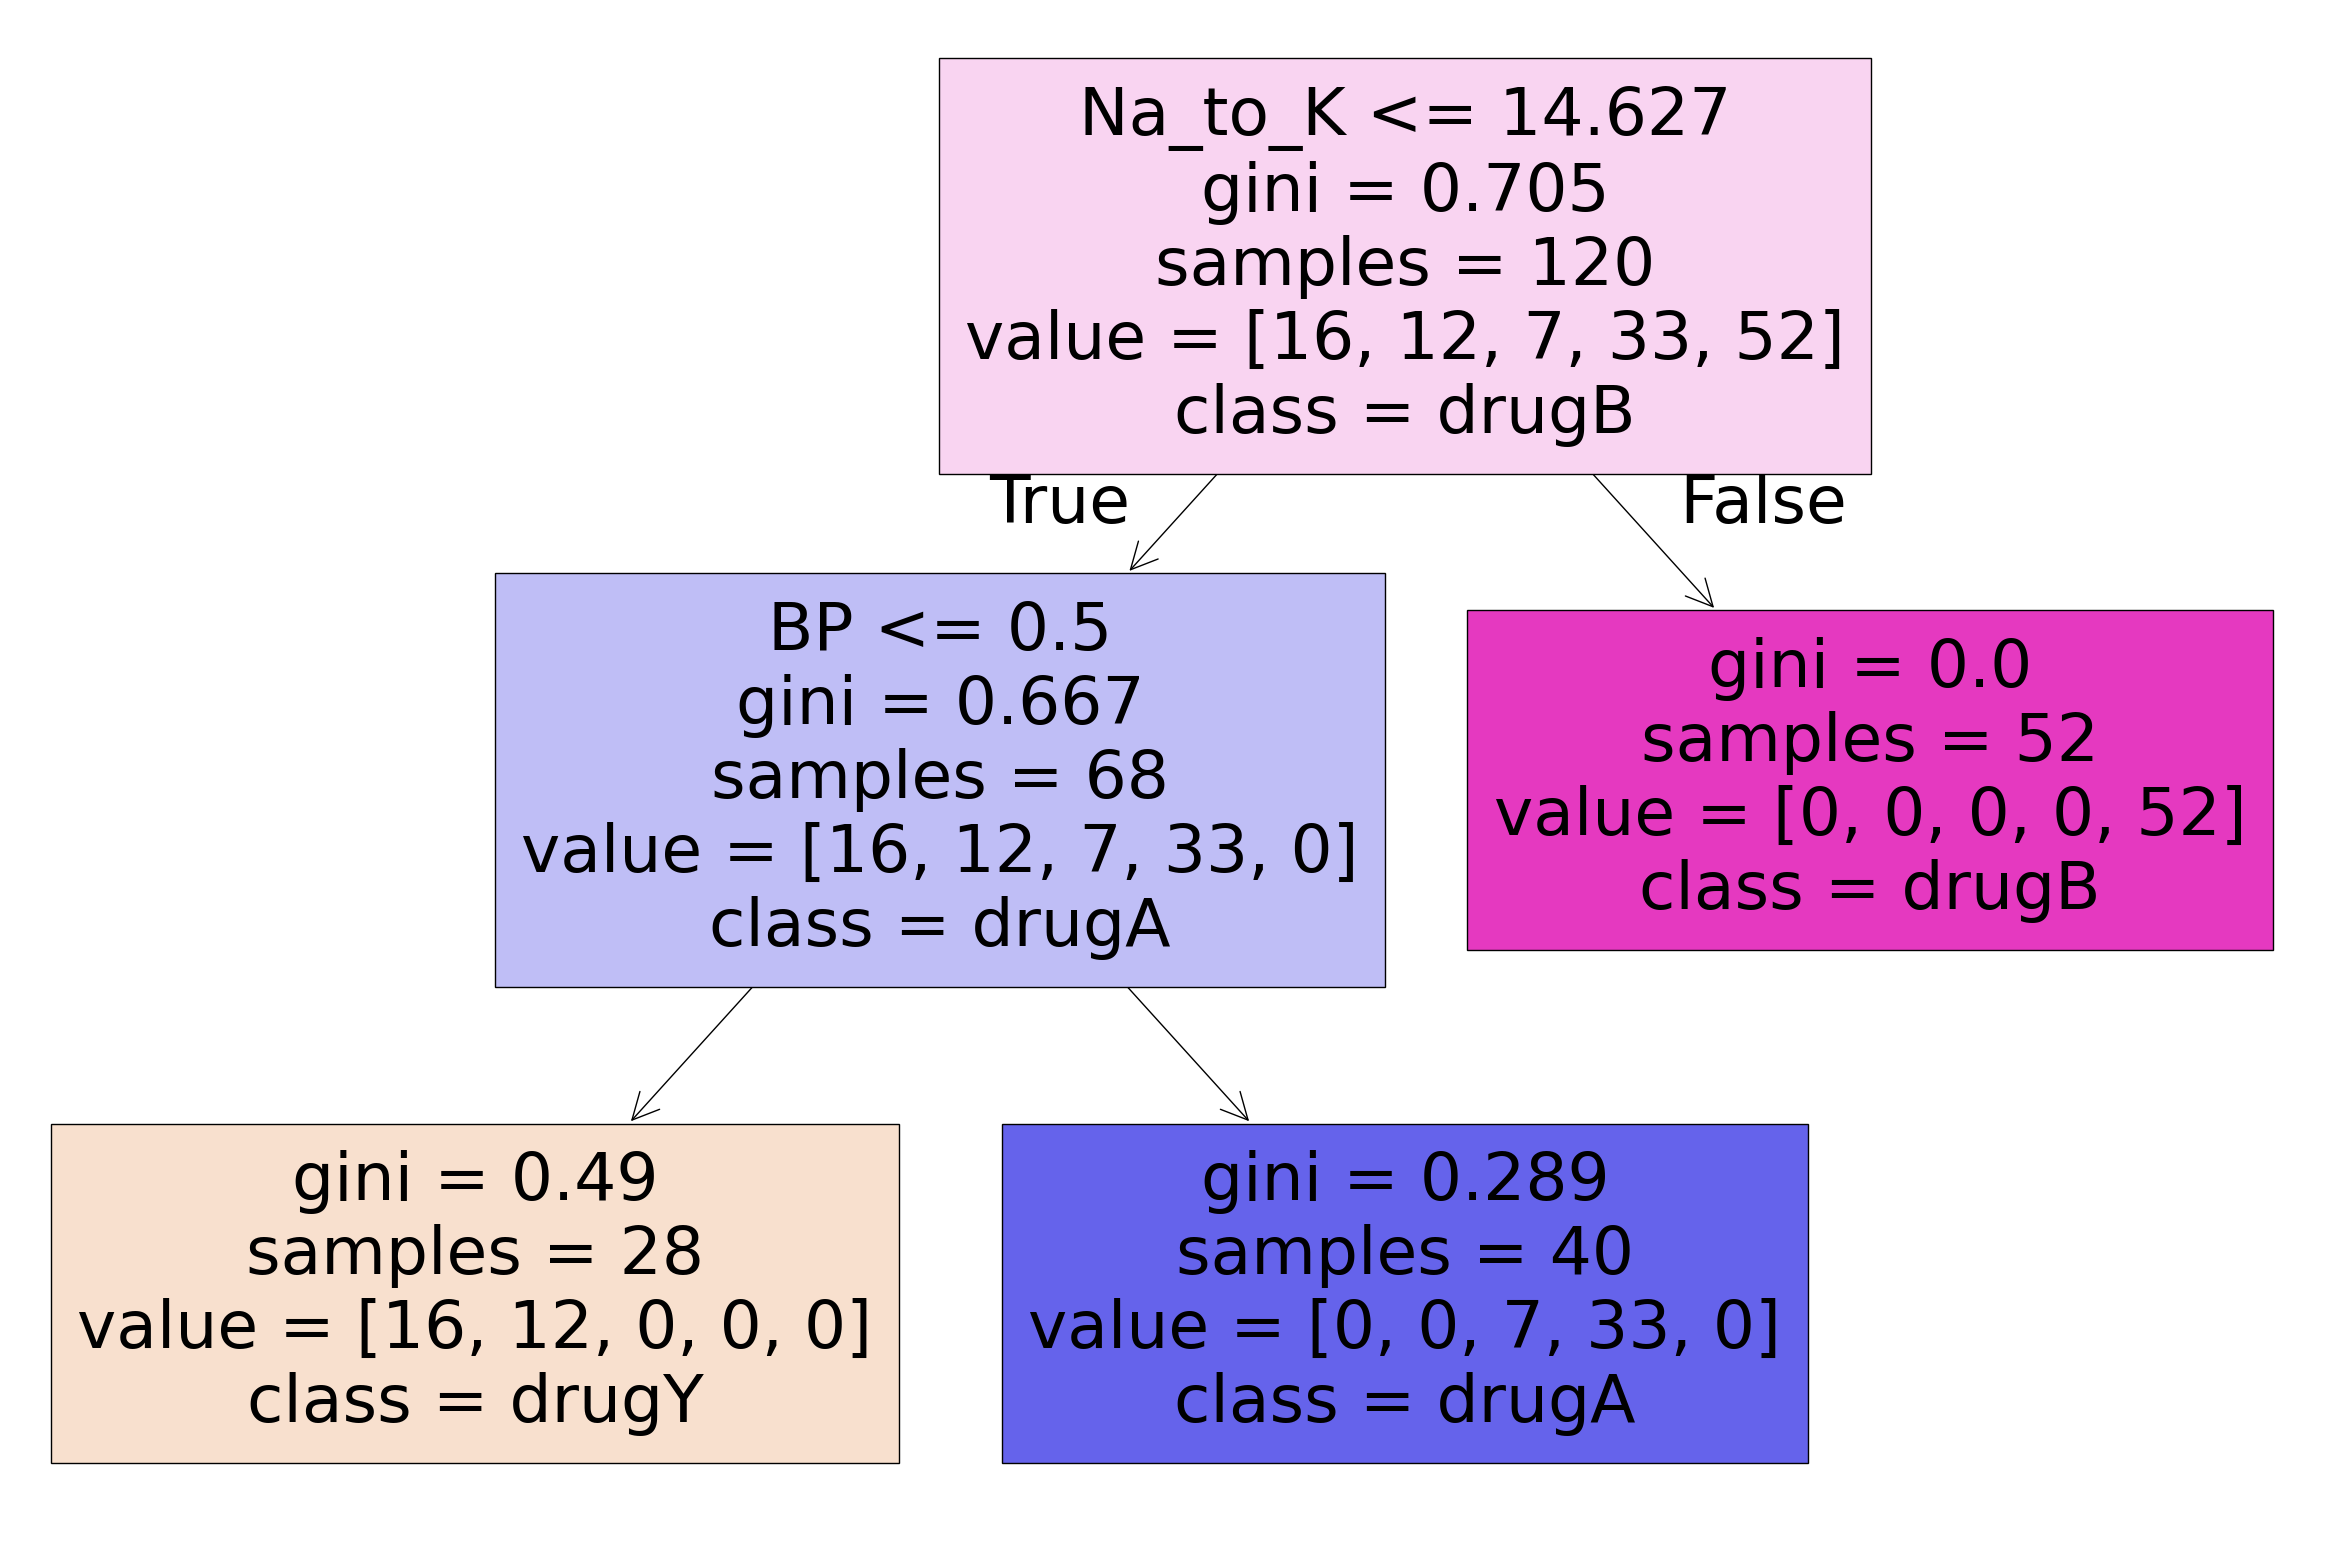

In [106]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01, max_depth=2)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

# unda 2 qilganim uchun endi 2 qator bo'ldi bunda 2 o'rniga 10 qilganimda 10 qator bo'lmaydi
# chunki gini 0 bo'lguncha bunga 5 yetarli yani maksimal 5 qator bo'ladi ammo boshqa df lar uchun
# yani kattaroqlari uchun 10 va undan katta sonlarni ham bersak bo'ladi

## **min_sample_leaf** - leaf mode (yakuniy, barg tugun) hosil qilish uchun eng kam elementlar soni

DecisionTree's Accuracy:  0.875


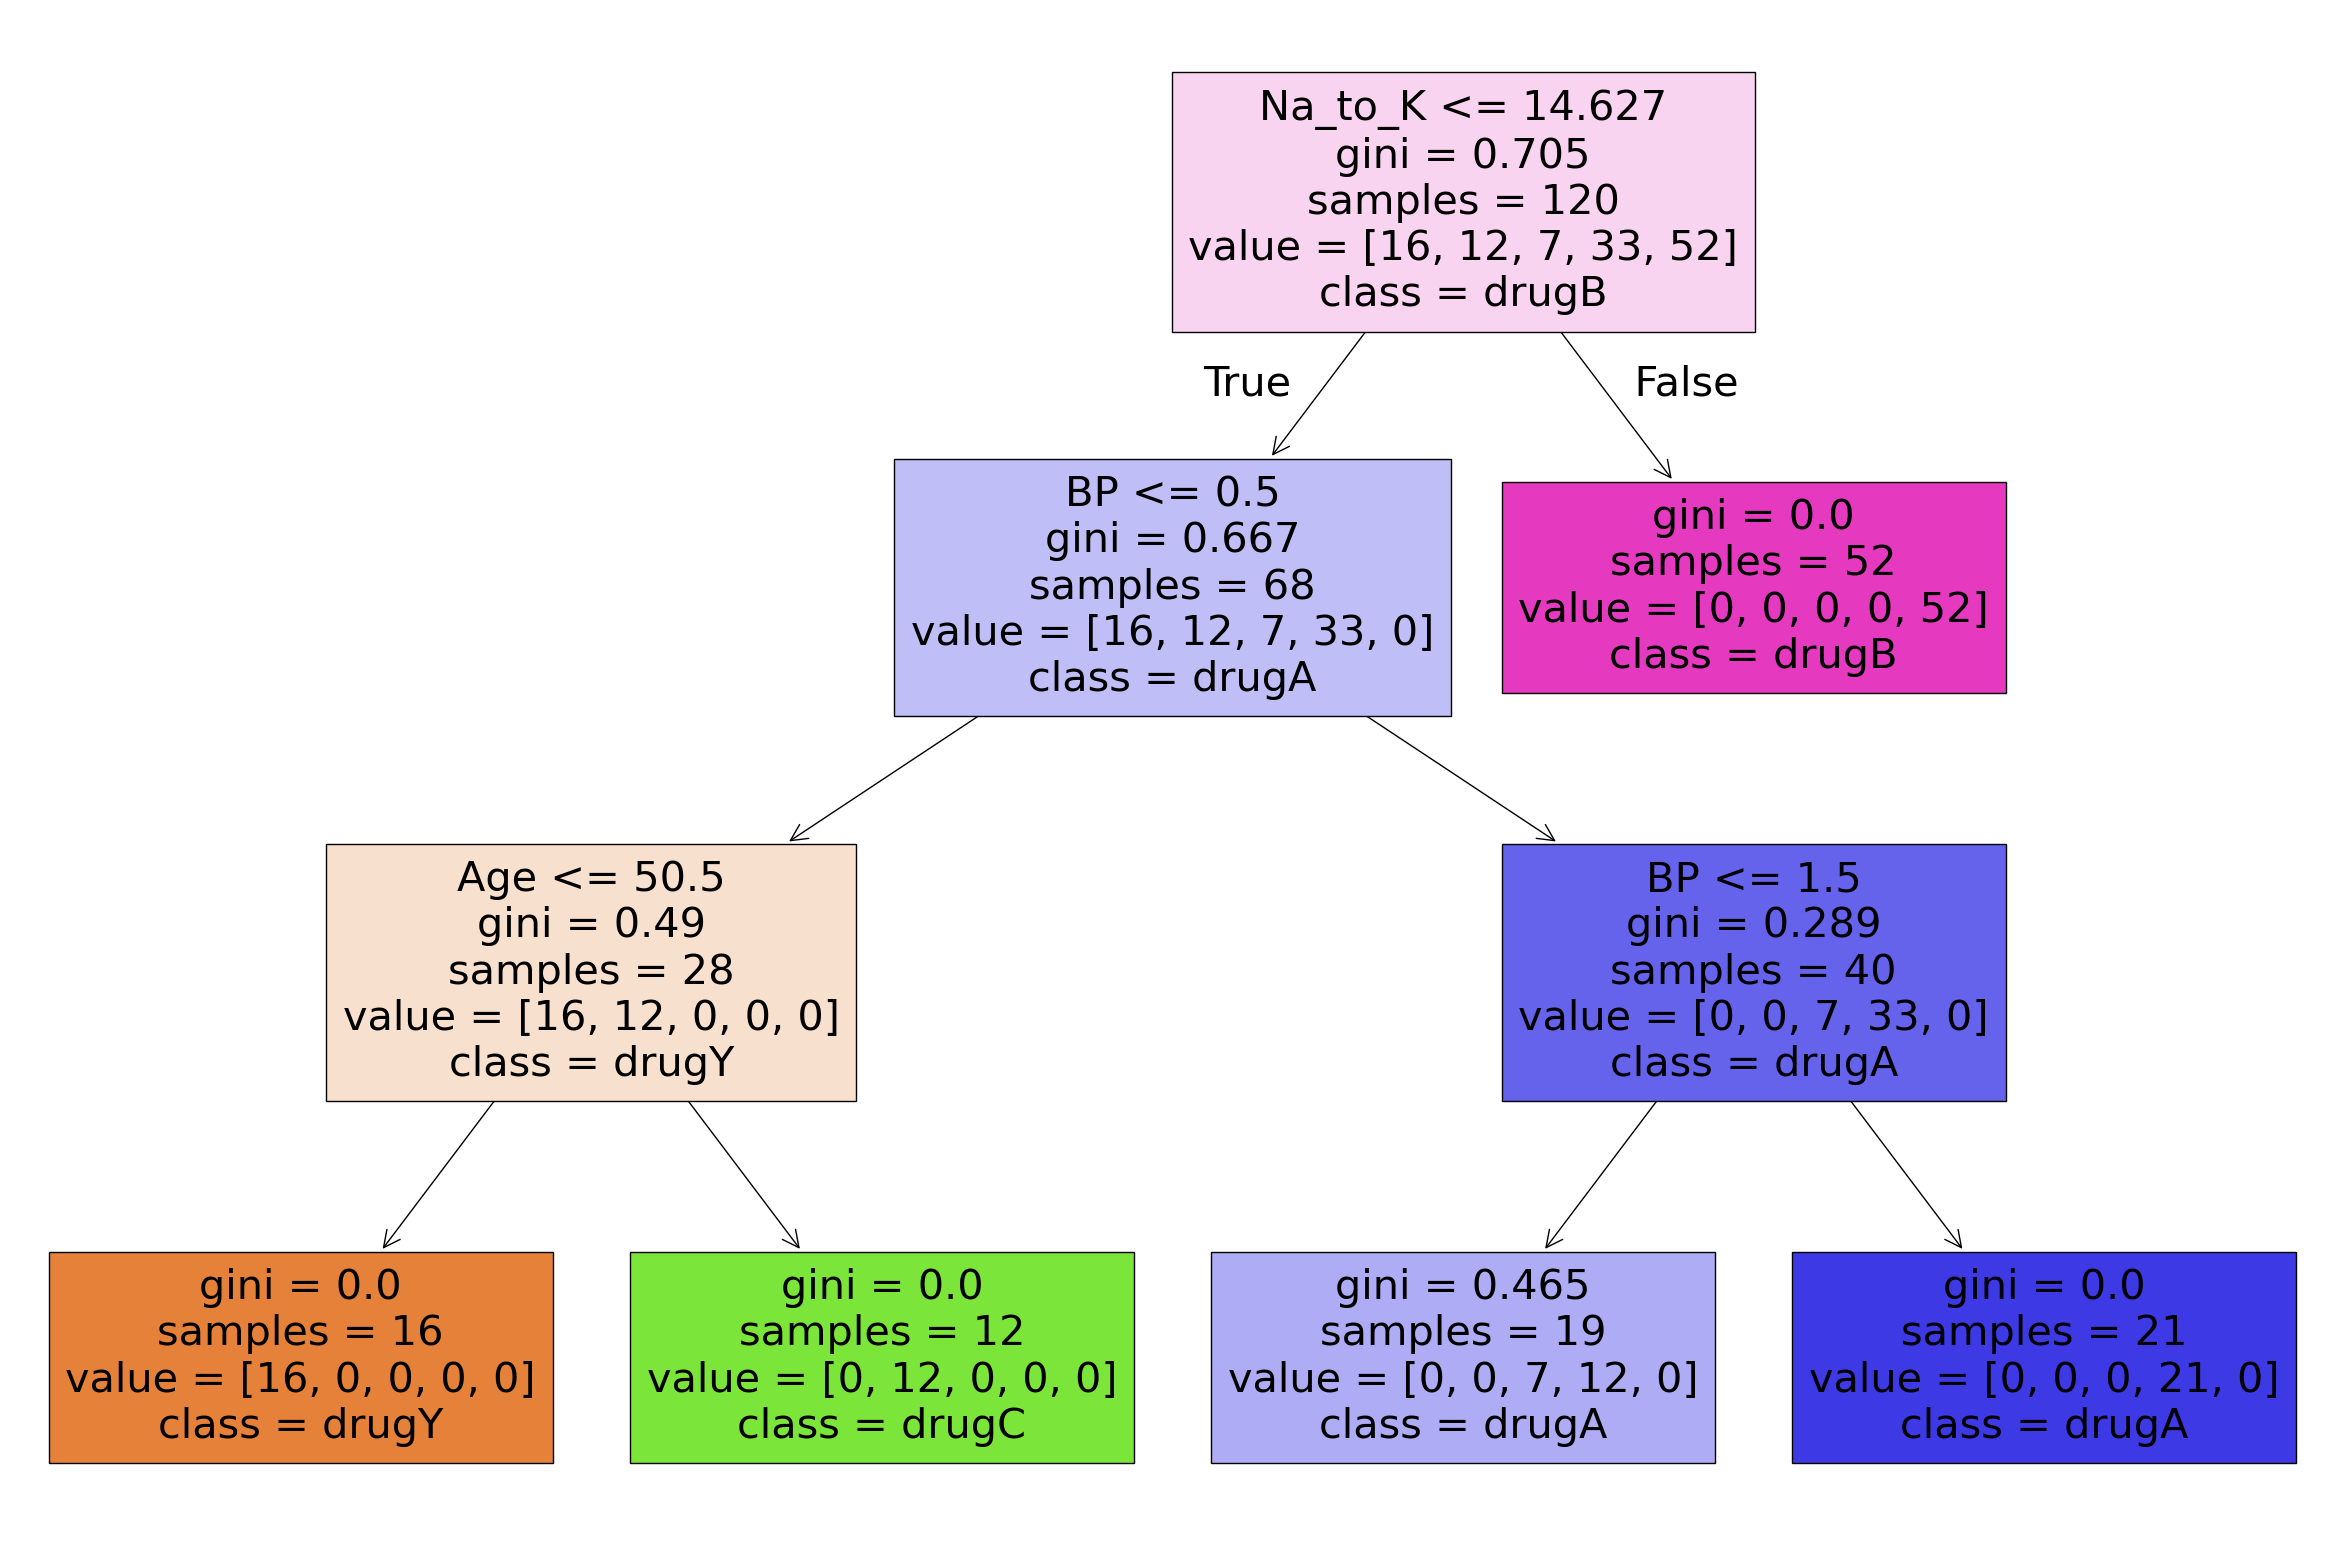

In [107]:
tree_model = DecisionTreeClassifier(min_samples_leaf=3, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

# min_samples_leaf=5  degani shuki, agar biror tugun ajratilganidan keyin hosil bo'ladigan barg tugunida 3 tadan
# kam namuna qolsa, bu ajratishga yo'l qo'yilmaydi. Tugun barg tuguni bo'lib qolaveradi va undan keyingi ajratishlar amalga oshirilmaydi.

## **Decision Tree Giperparametrlarining Tushuntirishi**

**1. `min_impurity_decrease`:**
*   **Ma'nosi:** Bu tugunni ajratishdan oldin kirlilik (impurity) darajasidagi minimal pasayishni belgilaydi. Agar biror ajralish natijasida kirlilik shu qiymatdan kamroq pasaysa, ajralish amalga oshirilmaydi va tugun barg tuguniga aylanadi.
*   **Vazifasi:** Daraxtni haddan tashqari moslashishdan (overfitting) himoya qilish uchun ishlatiladi, faqat sezilarli foyda keltiradigan ajralishlarga ruxsat beradi.

**2. `max_depth`:**
*   **Ma'nosi:** Daraxtning maksimal chuqurligini belgilaydi. Ya'ni, ildiz tugundan eng uzoq barg tugunigacha bo'lgan yo'ldagi tugunlar sonini cheklaydi.
*   **Vazifasi:** Chuqur daraxtlar o'quv ma'lumotlariga juda yaxshi moslashishi mumkin, ammo yangi ma'lumotlarda yomon natija berishi (overfitting) mumkin. `max_depth` bu xavfni kamaytiradi.

**3. `min_samples_leaf`:**
*   **Ma'nosi:** Barg tugunida bo'lishi kerak bo'lgan minimal namunalar (obyektlar) sonini belgilaydi. Agar biror ajralish natijasida bitta barg tugunida ushbu qiymatdan kamroq namuna qolsa, bu ajralishga yo'l qo'yilmaydi.
*   **Vazifasi:** Juda kichik barg tugunlarining paydo bo'lishini oldini oladi, bu ham overfittingni kamaytirishga yordam beradi, chunki bunday tugunlar ma'lumotlardagi shovqinlarga haddan tashqari sezgir bo'lishi mumkin.

**4. Gini impurity (Gini kirliligi):**
*   **Ma'nosi:** Bu ma'lum bir tugundagi ma'lumotlarning qanchalik 'aralashgan' yoki 'notoza' ekanligini o'lchaydigan ko'rsatkich. Agar tugundagi barcha namunalar bir xil sinfga tegishli bo'lsa, Gini kirliligi 0 ga teng bo'ladi (sof tugun). Agar namunalar teng taqsimlangan bo'lsa, Gini kirliligi yuqori bo'ladi.
*   **Vazifasi:** Qaror daraxtlari ma'lumotlarni ajratishda Gini kirliligini maksimal darajada kamaytiradigan atributni tanlaydi. Boshqa bir o'lchov – **Entropiya** ham xuddi shunday vazifani bajaradi.

# **NEW SECTION**

Random Forest – bu Machine Learning (Mashina O'rganish) algoritmi bo'lib, u bir nechta Qaror Daraxtlarini (Decision Tree) birlashtirib ishlaydi. U ansambl o'rganish (ensemble learning) metodining bir turi hisoblanadi. Asosan klassifikatsiya (turlarga ajratish) va regressiya (qiymat bashorati) muammolarini hal qilishda ishlatiladi.

Qanday ishlaydi?

Ko'plab Daraxtlar: Random Forest bir vaqtning o'zida ko'plab alohida Qaror Daraxtlarini yaratadi.
Tasodifiylik: Har bir daraxt ma'lumotlarning tasodifiy kichik qismi (bootstrap sampling) va xususiyatlarning tasodifiy kichik qismi (feature randomness) asosida o'qitiladi. Bu har bir daraxtning biroz farqli bo'lishini ta'minlaydi.
Ovoz Berish / O'rtacha Qiymat:
Klassifikatsiyada: Agar muammo sinflarga ajratish bo'lsa, har bir daraxt o'zining bashoratini beradi va yakuniy bashorat eng ko'p ovoz olgan sinf (majority vote) bo'ladi.
Regressiyada: Agar muammo sonli qiymatni bashorat qilish bo'lsa, barcha daraxtlarning bashoratlarining o'rtachasi (average) yakuniy natija sifatida olinadi.

Afzalliklari:

Yuqori Aniqlik: Ko'plab daraxtlarni birlashtirish orqali, u yakka Qaror Daraxtlariga nisbatan ancha yuqori aniqlikni ta'minlaydi.
Overfittingga Chidamli: Tasodifiylik tufayli, Random Forest birgina daraxtga nisbatan overfittingga kamroq moyil bo'ladi.
Xususiyatlar Muhimligini Aniqlash: Qaysi xususiyatlar (featurelar) model uchun muhimligini aniqlashga yordam beradi.
Katta Ma'lumotlar To'plamlari bilan Yaxshi Ishlaydi: Katta va murakkab ma'lumotlar to'plamlari bilan samarali ishlash qobiliyatiga ega.

n_estimators parametri Random Forest algoritmidagi giperparametr bo'lib, u o'rmondagi Qaror Daraxtlari sonini belgilaydi. Uni ko'paytirish odatda model aniqligini oshiradi, ammo hisoblash vaqtini ham oshirishi mumkin. Sizning misolingizda n_estimators=20 bo'lgani uchun, model 20 ta Qaror Daraxtidan iborat o'rmonni yaratgan.



# Random Forest

[Hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
- `n_estimators` - o'rmondagi daraxtlar soni.


In [108]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Random Forest modelini tashkil etuvchi qaror daraxtlari (Decision Trees) sonini belgilaydi.
# Sizning holatingizda, model 20 ta alohida qaror daraxtidan iborat bo'ladi.
# Vazifasi: Ko'proq daraxtlar odatda modelning aniqligini oshiradi, chunki u bashoratlarni o'rtachalashtirish
# orqali yakka daraxtlarning kamchiliklarini qoplaydi. Biroq, daraxtlar sonini haddan tashqari
# oshirish hisoblash vaqtini sezilarli darajada oshirishi mumkin va aniqlikdagi sezilarli yaxshilanishga
# olib kelmasligi mumkin. Odatda, optimal n_estimators qiymatini topish uchun tajribalar o'tkaziladi.


              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93         7
       drugB       1.00      0.75      0.86         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.97        80
   macro avg       0.97      0.94      0.95        80
weighted avg       0.98      0.97      0.97        80



In [109]:
print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_pred))

DecisionTree's Accuracy:  0.975


In [110]:
rf_model = RandomForestClassifier(n_estimators=100, max_features = 'sqrt')
# max_features='sqrt' degani shuki, har bir tugunni ajratish jarayonida, algoritm jami xususiyatlar sonining
# kvadrat ildizi (square root) miqdoridagi tasodifiy xususiyatlar to'plamini ko'rib chiqadi. Masalan, agar sizda 100 ta
# xususiyat bo'lsa, har bir tugunni ajratishda u tasodifiy ravishda $\sqrt{100} = 10$$\sqrt{100} = 10$ ta xususiyatni
# tanlab oladi va eng yaxshi ajratishni shu 10 ta xususiyat orasidan qidiradi.
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# n_estimators=100  qilganimiz uchun uning aniqligi yana oshdi yani 0.98 bo'ldi, yuqorida 0.95 edi

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [111]:
print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_pred))


DecisionTree's Accuracy:  0.9875
